# Import Modules
You may need to install some of them.

In [5]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

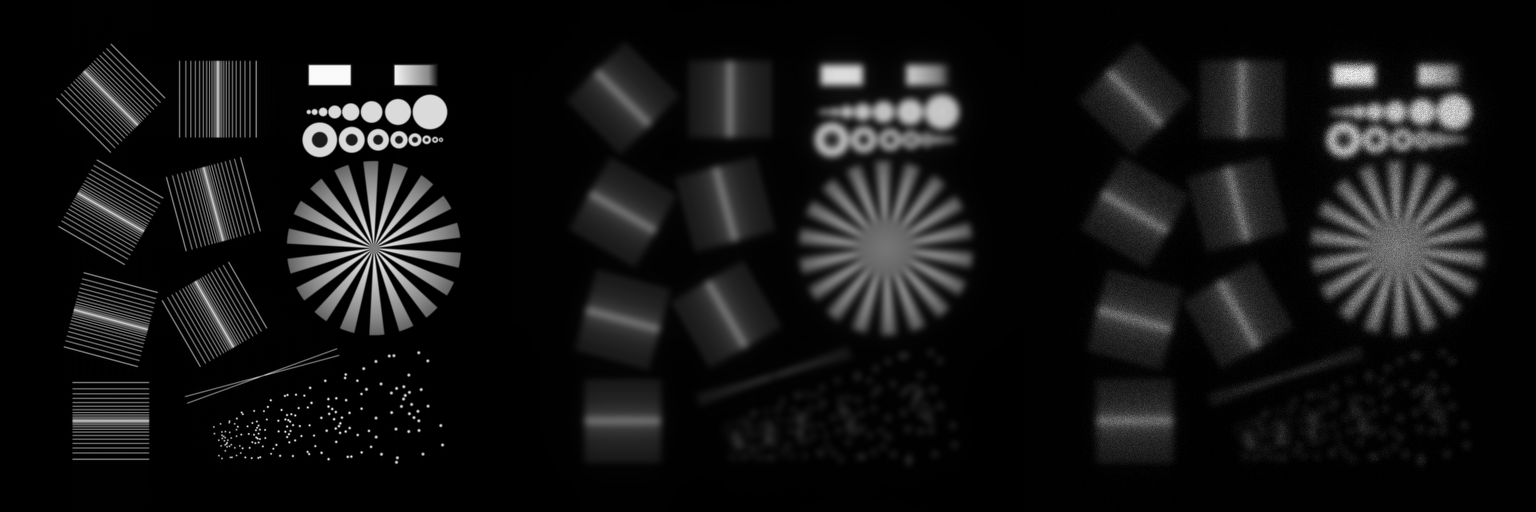

In [6]:
# load test images
img = Float32.(testimage("resolution_test_512"))

psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = Float32.(conv_psf(img, psf, [1, 2]))
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Let's test Good's roughness

  2.086666 seconds (66.54 M allocations: 3.168 GiB, 6.79% gc time, 16.02% compilation time)
optim_res =  * Status: success

 * Candidate solution
    Final objective value:     5.364085e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.50e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.05e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.11e-03 ≰ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    28
    f(x) calls:    83
    ∇f(x) calls:   83

  1.270061 seconds (36.64 M allocations: 1.768 GiB, 5.71% gc time, 26.11% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.364094e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.47e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.28e-02 ≰

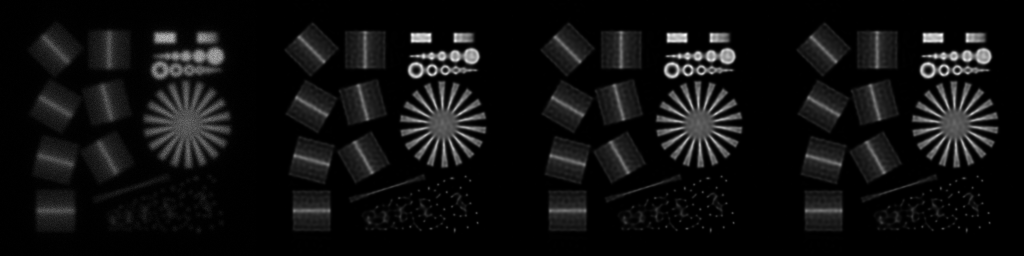

In [8]:
@time resGR100, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=100)
@show optim_res

@time resGR15, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=15)
@show optim_res

@time resGR15_2, optim_res = deconvolution(img_n, psf, λ=0.05, regularizer=GR(), iterations=15)
@show optim_res


h_view(img_n, resGR100, resGR15, resGR15_2)

# Let's test Total Variation

  2.265040 seconds (3.31 M allocations: 2.807 GiB, 11.63% gc time, 32.00% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.389876e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 5.36e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.42e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.80e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.33e-06 ≰ 0.0e+00
    |g(x)|                 = 3.94e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    50
    f(x) calls:    141
    ∇f(x) calls:   141

  1.004516 seconds (2.18 M allocations: 935.465 MiB, 5.09% gc time, 56.43% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.391415e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 7.59e-03 ≰ 0.0e+

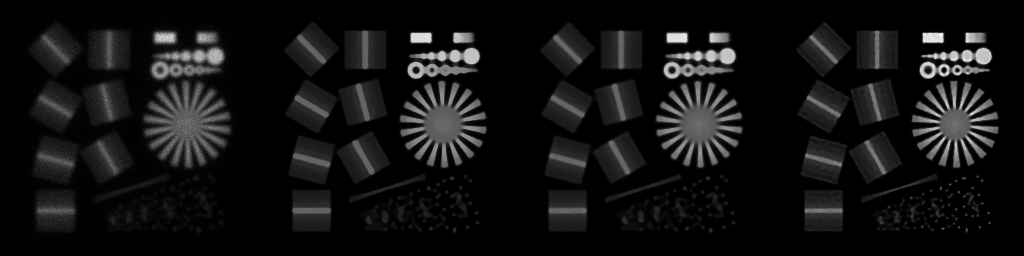

In [9]:
@time resTV50, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=50)
@show optim_res
 
@time resTV15, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=15)
@show optim_res
 
@time resTV15_2, optim_res = deconvolution(img_n, psf, λ=0.005, regularizer=TV(), iterations=15)
@show optim_res

h_view(img_n, resTV50, resTV15, resTV15_2)

# Let's test Tikhonov

  1.022073 seconds (2.20 M allocations: 991.016 MiB, 4.31% gc time, 57.86% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.374722e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.38e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.26e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.24e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.03e-06 ≰ 0.0e+00
    |g(x)|                 = 2.25e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    15
    f(x) calls:    44
    ∇f(x) calls:   44

  1.022655 seconds (2.01 M allocations: 1018.656 MiB, 4.24% gc time, 52.92% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.359460e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.13e-02 ≰ 0.0e+

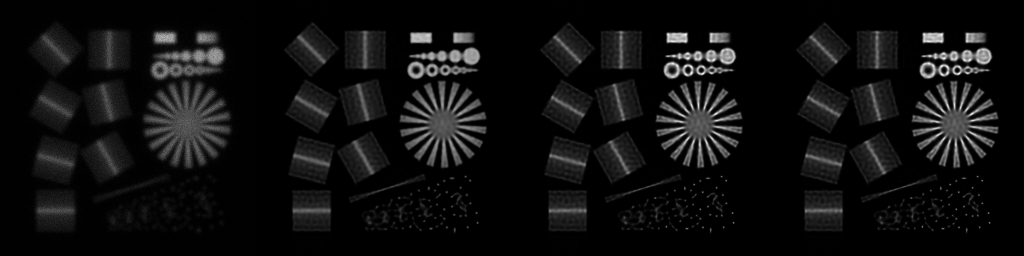

In [10]:
@time resTik1, optim_res = deconvolution(img_n, psf, λ=0.001, regularizer=Tikhonov(), iterations=15)
@show optim_res


@time resTik2, optim_res = deconvolution(img_n, psf, λ=0.0001, 
                    regularizer=Tikhonov(mode="spatial_grad_square"), iterations=15)
@show optim_res

@time resTik3, optim_res = deconvolution(img_n, psf, λ=0.0001, 
    regularizer=Tikhonov(mode="identity"), iterations=15)
@show optim_res

h_view(img_n, resTik1, resTik2, resTik3)

# Let's test without regularizer 

  1.464681 seconds (940.63 k allocations: 2.529 GiB, 5.56% gc time, 17.25% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.359052e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.87e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.97e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.34e-02 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.37e-07 ≰ 0.0e+00
    |g(x)|                 = 1.50e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    50
    f(x) calls:    149
    ∇f(x) calls:   149

  0.363082 seconds (11.65 k allocations: 814.710 MiB, 5.55% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.359439e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.16e-02 ≰ 0.0e+00
    |x - x'|/|x'|   

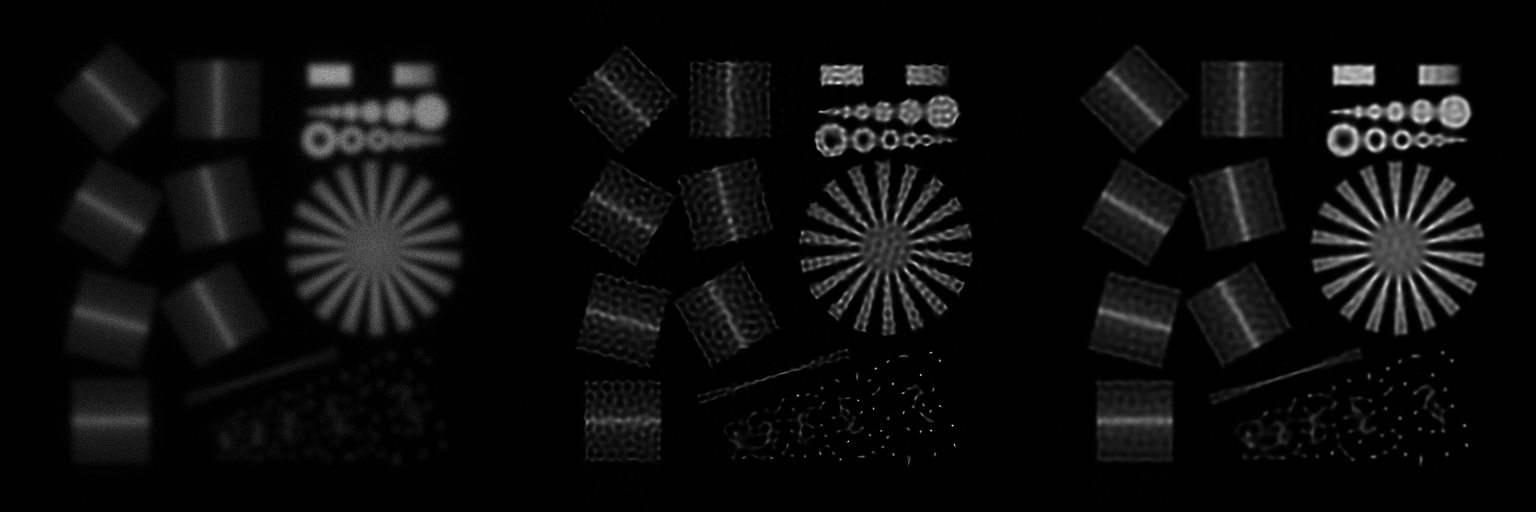

In [11]:
@time res100, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=50)
@show optim_res

@time res15, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=15)
@show optim_res

h_view(img_n, 0.7 .* res100, res15)

## Let's have a look at good results of some of the regularizers next to each other.

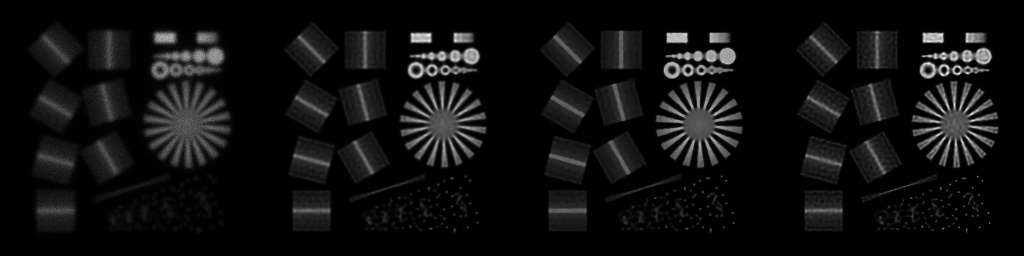

In [12]:
h_view(img_n, resGR15_2, resTV15_2, resTik3)